In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Database bua belum matang.xlsx')
dfMatang = pd.read_excel('Database Buah matang.xlsx')
dfBusuk = pd.read_excel('Database bua busuk.xlsx')

In [3]:
print(df.dtypes)
print(dfMatang.dtypes)
print(dfBusuk.dtypes)

id          int64
tgs822      int64
tgs2611     int64
mq4         int64
mq136       int64
tgs2620     int64
mics5524    int64
tgs2602     int64
mq2         int64
mq5         int64
tgs2600     int64
tgs826      int64
tgs2610     int64
tgs813      int64
dtype: object
id          int64
tgs822      int64
tgs2611     int64
mq4         int64
mq136       int64
tgs2620     int64
mics5524    int64
tgs2602     int64
mq2         int64
mq5         int64
tgs2600     int64
tgs826      int64
tgs2610     int64
tgs813      int64
dtype: object
id          int64
tgs822      int64
tgs2611     int64
mq4         int64
mq136       int64
tgs2620     int64
mics5524    int64
tgs2602     int64
mq2         int64
mq5         int64
tgs2600     int64
tgs826      int64
tgs2610     int64
tgs813      int64
dtype: object


<AxesSubplot:>

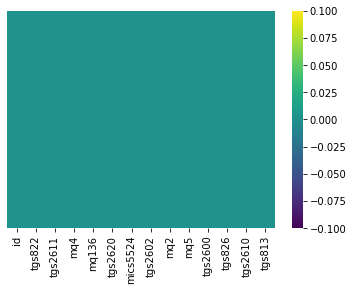

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [5]:
df['kode'] = 1
dfMatang['kode'] = 2
dfBusuk['kode'] = 3

In [6]:
dfGabungan = pd.concat([df,dfMatang,dfBusuk], join='outer', ignore_index=True)

In [7]:
dfGabungan.shape

(8741, 15)

In [9]:
dfGabungan.head(5)

,id,tgs822,tgs2611,mq4,mq136,tgs2620,mics5524,tgs2602,mq2,mq5,tgs2600,tgs826,tgs2610,tgs813,kode
0,1,32,155,116,34,148,61,120,65,39,83,39,78,6,1
1,2,31,155,116,35,144,59,118,65,39,83,40,79,6,1
2,3,32,155,116,33,146,58,119,65,39,82,38,78,5,1
3,4,32,157,117,34,152,59,118,66,39,83,38,79,6,1
4,5,33,158,118,34,146,60,117,67,40,83,40,83,5,1


In [10]:
dfGabungan.drop(['id'],axis=1, inplace=True)

<AxesSubplot:xlabel='kode', ylabel='count'>

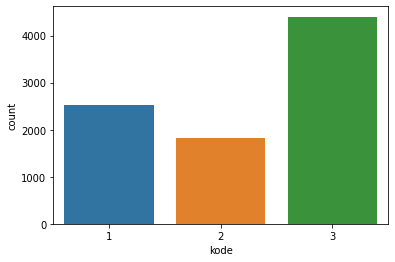

In [11]:
sns.countplot(x='kode', data=dfGabungan)

<AxesSubplot:ylabel='Frequency'>

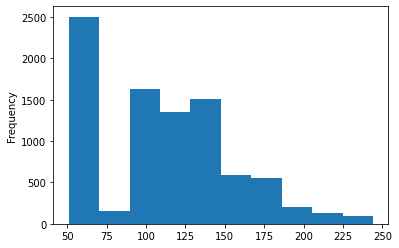

In [12]:
dfGabungan['mics5524'].plot.hist()

In [13]:
dfGabungan['kode'].value_counts()

3    4401
1    2519
2    1821
Name: kode, dtype: int64

In [14]:
 # Train Data
# tentukan dependen dan independen var
X= dfGabungan.drop('kode', axis=1)
y= dfGabungan['kode']

In [15]:
# library untuk split data
from sklearn.model_selection import train_test_split
# split data ke beberapa bagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)

In [18]:
# buat model
from sklearn.linear_model import LogisticRegression
# buat model
logModel = LogisticRegression(max_iter=1000)
# latih model
dp = logModel.fit(X_train.values, y_train.values)

In [20]:
import pickle
pickle.dump(dp, open('banana.pkl', 'wb'))